In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt




In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/"

In [3]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [4]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [5]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [6]:
df = pd.read_csv(dir_origen_csv + "sera.csv", low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-04 18:28:45,15029835,1144934,123.8179,122.0391,125.7861,0.0013,0.0016,0.0110,A3,...,-79.4733,IGLESIA,0.1440,0.0000,bajo,7,0,0,0.072000,14
7,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
8,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
9,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14


In [7]:
max(df.fecha)

Timestamp('2019-06-03 19:56:55')

In [8]:
min(df.fecha)

Timestamp('2019-04-04 06:02:05')

In [9]:
df.set_index("fecha", inplace = True)

In [10]:
Series = []
count = 0
missing_count = 0
for n,g in df.groupby(["medidor", df.index.day, df.index.month]):
    #g.set_index("fecha", inplace = True)

    g = g.resample("h").mean()
    #g.dropna(inplace = True)
    #print(g.isna().sum().sum())
    
    g.fillna(method = "bfill", inplace = True)

    if (len(g) ==13):
        Series.append(g)
        print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
    else:
        missing_count += 1
    count +=1

(15029835, 1, 5):   6--18  Tamaño: 13 indice: 0
(15029835, 1, 6):   7--19  Tamaño: 13 indice: 1
(15029835, 2, 5):   6--18  Tamaño: 13 indice: 2
(15029835, 2, 6):   7--19  Tamaño: 13 indice: 3
(15029835, 3, 5):   6--18  Tamaño: 13 indice: 4
(15029835, 3, 6):   7--19  Tamaño: 13 indice: 5
(15029835, 4, 4):   6--18  Tamaño: 13 indice: 6
(15029835, 4, 5):   6--18  Tamaño: 13 indice: 7
(15029835, 5, 5):   6--18  Tamaño: 13 indice: 9
(15029835, 6, 4):   7--19  Tamaño: 13 indice: 10
(15029835, 6, 5):   6--18  Tamaño: 13 indice: 11
(15029835, 7, 4):   7--19  Tamaño: 13 indice: 12
(15029835, 7, 5):   6--18  Tamaño: 13 indice: 13
(15029835, 8, 4):   7--19  Tamaño: 13 indice: 14
(15029835, 8, 5):   6--18  Tamaño: 13 indice: 15
(15029835, 9, 4):   7--19  Tamaño: 13 indice: 16
(15029835, 9, 5):   6--18  Tamaño: 13 indice: 17
(15029835, 10, 4):   7--19  Tamaño: 13 indice: 18
(15029835, 10, 5):   6--18  Tamaño: 13 indice: 19
(15029835, 11, 4):   7--19  Tamaño: 13 indice: 20
(15029835, 12, 4):   7--19

(15029847, 1, 5):   6--18  Tamaño: 13 indice: 183
(15029847, 1, 6):   6--18  Tamaño: 13 indice: 184
(15029847, 2, 5):   6--18  Tamaño: 13 indice: 185
(15029847, 2, 6):   6--18  Tamaño: 13 indice: 186
(15029847, 3, 5):   6--18  Tamaño: 13 indice: 187
(15029847, 4, 4):   7--19  Tamaño: 13 indice: 189
(15029847, 4, 5):   6--18  Tamaño: 13 indice: 190
(15029847, 5, 5):   6--18  Tamaño: 13 indice: 192
(15029847, 6, 5):   6--18  Tamaño: 13 indice: 194
(15029847, 7, 4):   6--18  Tamaño: 13 indice: 195
(15029847, 7, 5):   6--18  Tamaño: 13 indice: 196
(15029847, 8, 4):   6--18  Tamaño: 13 indice: 197
(15029847, 8, 5):   6--18  Tamaño: 13 indice: 198
(15029847, 9, 4):   6--18  Tamaño: 13 indice: 199
(15029847, 10, 4):   6--18  Tamaño: 13 indice: 201
(15029847, 10, 5):   6--18  Tamaño: 13 indice: 202
(15029847, 11, 4):   6--18  Tamaño: 13 indice: 203
(15029847, 11, 5):   6--18  Tamaño: 13 indice: 204
(15029847, 12, 4):   6--18  Tamaño: 13 indice: 205
(15029847, 12, 5):   6--18  Tamaño: 13 indice

(15842894, 6, 4):   6--18  Tamaño: 13 indice: 376
(15842894, 6, 5):   7--19  Tamaño: 13 indice: 377
(15842894, 7, 5):   7--19  Tamaño: 13 indice: 379
(15842894, 8, 4):   6--18  Tamaño: 13 indice: 380
(15842894, 8, 5):   7--19  Tamaño: 13 indice: 381
(15842894, 9, 4):   6--18  Tamaño: 13 indice: 382
(15842894, 10, 4):   6--18  Tamaño: 13 indice: 384
(15842894, 10, 5):   7--19  Tamaño: 13 indice: 385
(15842894, 11, 4):   6--18  Tamaño: 13 indice: 386
(15842894, 11, 5):   7--19  Tamaño: 13 indice: 387
(15842894, 12, 4):   6--18  Tamaño: 13 indice: 388
(15842894, 12, 5):   7--19  Tamaño: 13 indice: 389
(15842894, 13, 4):   6--18  Tamaño: 13 indice: 390
(15842894, 13, 5):   7--19  Tamaño: 13 indice: 391
(15842894, 14, 4):   6--18  Tamaño: 13 indice: 392
(15842894, 14, 5):   7--19  Tamaño: 13 indice: 393
(15842894, 15, 4):   6--18  Tamaño: 13 indice: 394
(15842894, 15, 5):   7--19  Tamaño: 13 indice: 395
(15842894, 16, 4):   6--18  Tamaño: 13 indice: 396
(15842894, 16, 5):   6--18  Tamaño: 1

(16567760, 9, 5):   6--18  Tamaño: 13 indice: 566
(16567760, 10, 4):   6--18  Tamaño: 13 indice: 567
(16567760, 11, 4):   6--18  Tamaño: 13 indice: 569
(16567760, 11, 5):   6--18  Tamaño: 13 indice: 570
(16567760, 12, 4):   6--18  Tamaño: 13 indice: 571
(16567760, 12, 5):   6--18  Tamaño: 13 indice: 572
(16567760, 13, 4):   6--18  Tamaño: 13 indice: 573
(16567760, 13, 5):   6--18  Tamaño: 13 indice: 574
(16567760, 14, 4):   6--18  Tamaño: 13 indice: 575
(16567760, 14, 5):   6--18  Tamaño: 13 indice: 576
(16567760, 15, 4):   6--18  Tamaño: 13 indice: 577
(16567760, 15, 5):   6--18  Tamaño: 13 indice: 578
(16567760, 16, 4):   6--18  Tamaño: 13 indice: 579
(16567760, 16, 5):   6--18  Tamaño: 13 indice: 580
(16567760, 17, 4):   6--18  Tamaño: 13 indice: 581
(16567760, 17, 5):   6--18  Tamaño: 13 indice: 582
(16567760, 18, 5):   6--18  Tamaño: 13 indice: 584
(16567760, 19, 4):   6--18  Tamaño: 13 indice: 585
(16567760, 20, 4):   6--18  Tamaño: 13 indice: 587
(16567760, 21, 4):   6--18  Tama

(16951175, 21, 4):   6--18  Tamaño: 13 indice: 772
(16951175, 21, 5):   6--18  Tamaño: 13 indice: 773
(16951175, 22, 4):   6--18  Tamaño: 13 indice: 774
(16951175, 22, 5):   6--18  Tamaño: 13 indice: 775
(16951175, 23, 4):   6--18  Tamaño: 13 indice: 776
(16951175, 23, 5):   6--18  Tamaño: 13 indice: 777
(16951175, 24, 4):   6--18  Tamaño: 13 indice: 778
(16951175, 24, 5):   6--18  Tamaño: 13 indice: 779
(16951175, 25, 4):   6--18  Tamaño: 13 indice: 780
(16951175, 25, 5):   6--18  Tamaño: 13 indice: 781
(16951175, 26, 4):   6--18  Tamaño: 13 indice: 782
(16951175, 26, 5):   6--18  Tamaño: 13 indice: 783
(16951175, 27, 4):   7--19  Tamaño: 13 indice: 784
(16951175, 27, 5):   6--18  Tamaño: 13 indice: 785
(16951175, 28, 4):   7--19  Tamaño: 13 indice: 786
(16951175, 28, 5):   6--18  Tamaño: 13 indice: 787
(16951175, 29, 4):   7--19  Tamaño: 13 indice: 788
(16951175, 29, 5):   6--18  Tamaño: 13 indice: 789
(16951175, 30, 5):   6--18  Tamaño: 13 indice: 791
(16951175, 31, 5):   6--18  Tam

(16951199, 25, 4):   7--19  Tamaño: 13 indice: 963
(16951199, 25, 5):   7--19  Tamaño: 13 indice: 964
(16951199, 26, 5):   7--19  Tamaño: 13 indice: 966
(16951199, 27, 4):   6--18  Tamaño: 13 indice: 967
(16951199, 27, 5):   7--19  Tamaño: 13 indice: 968
(16951199, 28, 4):   6--18  Tamaño: 13 indice: 969
(16951199, 28, 5):   7--19  Tamaño: 13 indice: 970
(16951199, 29, 4):   6--18  Tamaño: 13 indice: 971
(16951199, 29, 5):   7--19  Tamaño: 13 indice: 972
(16951199, 30, 4):   6--18  Tamaño: 13 indice: 973
(16951199, 30, 5):   7--19  Tamaño: 13 indice: 974
(16951199, 31, 5):   7--19  Tamaño: 13 indice: 975
(16951201, 1, 5):   6--18  Tamaño: 13 indice: 976
(16951201, 1, 6):   6--18  Tamaño: 13 indice: 977
(16951201, 2, 5):   6--18  Tamaño: 13 indice: 978
(16951201, 2, 6):   6--18  Tamaño: 13 indice: 979
(16951201, 3, 5):   6--18  Tamaño: 13 indice: 980
(16951201, 4, 4):   6--18  Tamaño: 13 indice: 982
(16951201, 4, 5):   6--18  Tamaño: 13 indice: 983
(16951201, 5, 4):   6--18  Tamaño: 13 

(16951205, 30, 5):   6--18  Tamaño: 13 indice: 1157
(16951205, 31, 5):   6--18  Tamaño: 13 indice: 1158
(16951207, 1, 5):   6--18  Tamaño: 13 indice: 1159
(16951207, 1, 6):   6--18  Tamaño: 13 indice: 1160
(16951207, 2, 6):   6--18  Tamaño: 13 indice: 1162
(16951207, 3, 5):   6--18  Tamaño: 13 indice: 1163
(16951207, 4, 4):   6--18  Tamaño: 13 indice: 1165
(16951207, 4, 5):   6--18  Tamaño: 13 indice: 1166
(16951207, 5, 5):   6--18  Tamaño: 13 indice: 1168
(16951207, 6, 4):   6--18  Tamaño: 13 indice: 1169
(16951207, 6, 5):   6--18  Tamaño: 13 indice: 1170
(16951207, 7, 4):   6--18  Tamaño: 13 indice: 1171
(16951207, 7, 5):   6--18  Tamaño: 13 indice: 1172
(16951207, 8, 4):   6--18  Tamaño: 13 indice: 1173
(16951207, 9, 4):   6--18  Tamaño: 13 indice: 1175
(16951207, 10, 4):   6--18  Tamaño: 13 indice: 1177
(16951207, 10, 5):   6--18  Tamaño: 13 indice: 1178
(16951207, 11, 4):   6--18  Tamaño: 13 indice: 1179
(16951207, 11, 5):   6--18  Tamaño: 13 indice: 1180
(16951207, 12, 4):   6--1

(16951216, 11, 5):   7--19  Tamaño: 13 indice: 1363
(16951216, 12, 4):   7--19  Tamaño: 13 indice: 1364
(16951216, 12, 5):   7--19  Tamaño: 13 indice: 1365
(16951216, 13, 4):   7--19  Tamaño: 13 indice: 1366
(16951216, 13, 5):   7--19  Tamaño: 13 indice: 1367
(16951216, 14, 4):   7--19  Tamaño: 13 indice: 1368
(16951216, 14, 5):   7--19  Tamaño: 13 indice: 1369
(16951216, 15, 4):   7--19  Tamaño: 13 indice: 1370
(16951216, 15, 5):   7--19  Tamaño: 13 indice: 1371
(16951216, 16, 4):   7--19  Tamaño: 13 indice: 1372
(16951216, 16, 5):   7--19  Tamaño: 13 indice: 1373
(16951216, 17, 4):   7--19  Tamaño: 13 indice: 1374
(16951216, 17, 5):   7--19  Tamaño: 13 indice: 1375
(16951216, 18, 4):   7--19  Tamaño: 13 indice: 1376
(16951216, 18, 5):   7--19  Tamaño: 13 indice: 1377
(16951216, 19, 4):   7--19  Tamaño: 13 indice: 1378
(16951216, 20, 4):   7--19  Tamaño: 13 indice: 1380
(16951216, 20, 5):   6--18  Tamaño: 13 indice: 1381
(16951216, 21, 4):   7--19  Tamaño: 13 indice: 1382
(16951216, 2

(16951221, 14, 4):   6--18  Tamaño: 13 indice: 1551
(16951221, 14, 5):   6--18  Tamaño: 13 indice: 1552
(16951221, 15, 4):   6--18  Tamaño: 13 indice: 1553
(16951221, 15, 5):   6--18  Tamaño: 13 indice: 1554
(16951221, 16, 4):   6--18  Tamaño: 13 indice: 1555
(16951221, 16, 5):   6--18  Tamaño: 13 indice: 1556
(16951221, 17, 4):   6--18  Tamaño: 13 indice: 1557
(16951221, 17, 5):   6--18  Tamaño: 13 indice: 1558
(16951221, 19, 4):   6--18  Tamaño: 13 indice: 1561
(16951221, 20, 4):   6--18  Tamaño: 13 indice: 1563
(16951221, 20, 5):   6--18  Tamaño: 13 indice: 1564
(16951221, 21, 5):   6--18  Tamaño: 13 indice: 1566
(16951221, 22, 4):   6--18  Tamaño: 13 indice: 1567
(16951221, 22, 5):   6--18  Tamaño: 13 indice: 1568
(16951221, 23, 4):   6--18  Tamaño: 13 indice: 1569
(16951221, 23, 5):   6--18  Tamaño: 13 indice: 1570
(16951221, 24, 4):   6--18  Tamaño: 13 indice: 1571
(16951221, 24, 5):   6--18  Tamaño: 13 indice: 1572
(16951221, 25, 4):   6--18  Tamaño: 13 indice: 1573
(16951221, 2

(35924864, 13, 4):   6--18  Tamaño: 13 indice: 1854
(35924864, 14, 4):   6--18  Tamaño: 13 indice: 1856
(35924864, 15, 4):   6--18  Tamaño: 13 indice: 1858
(35924864, 16, 4):   6--18  Tamaño: 13 indice: 1860
(35924864, 17, 4):   6--18  Tamaño: 13 indice: 1862
(35924864, 18, 4):   6--18  Tamaño: 13 indice: 1864
(35924864, 19, 4):   6--18  Tamaño: 13 indice: 1866
(35924864, 20, 4):   6--18  Tamaño: 13 indice: 1868
(35924864, 20, 5):   6--18  Tamaño: 13 indice: 1869
(35924864, 21, 4):   6--18  Tamaño: 13 indice: 1870
(35924864, 21, 5):   6--18  Tamaño: 13 indice: 1871
(35924864, 22, 4):   6--18  Tamaño: 13 indice: 1872
(35924864, 22, 5):   6--18  Tamaño: 13 indice: 1873
(35924864, 23, 4):   6--18  Tamaño: 13 indice: 1874
(35924864, 23, 5):   6--18  Tamaño: 13 indice: 1875
(35924864, 24, 5):   6--18  Tamaño: 13 indice: 1877
(35924864, 25, 5):   6--18  Tamaño: 13 indice: 1879
(35924864, 26, 5):   6--18  Tamaño: 13 indice: 1881
(35924864, 27, 4):   6--18  Tamaño: 13 indice: 1882
(35924864, 2

(35925308, 6, 4):   6--18  Tamaño: 13 indice: 2206
(35925308, 6, 5):   6--18  Tamaño: 13 indice: 2207
(35925308, 7, 4):   6--18  Tamaño: 13 indice: 2208
(35925308, 7, 5):   6--18  Tamaño: 13 indice: 2209
(35925308, 8, 4):   6--18  Tamaño: 13 indice: 2210
(35925308, 9, 4):   6--18  Tamaño: 13 indice: 2212
(35925308, 9, 5):   7--19  Tamaño: 13 indice: 2213
(35925308, 10, 4):   6--18  Tamaño: 13 indice: 2214
(35925308, 10, 5):   7--19  Tamaño: 13 indice: 2215
(35925308, 11, 4):   6--18  Tamaño: 13 indice: 2216
(35925308, 11, 5):   7--19  Tamaño: 13 indice: 2217
(35925308, 12, 4):   6--18  Tamaño: 13 indice: 2218
(35925308, 12, 5):   7--19  Tamaño: 13 indice: 2219
(35925308, 13, 4):   6--18  Tamaño: 13 indice: 2220
(35925308, 13, 5):   7--19  Tamaño: 13 indice: 2221
(35925308, 14, 4):   6--18  Tamaño: 13 indice: 2222
(35925308, 14, 5):   7--19  Tamaño: 13 indice: 2223
(35925308, 15, 4):   6--18  Tamaño: 13 indice: 2224
(35925308, 15, 5):   7--19  Tamaño: 13 indice: 2225
(35925308, 16, 4): 

(41175730, 11, 4):   6--18  Tamaño: 13 indice: 2460
(41175730, 11, 5):   7--19  Tamaño: 13 indice: 2461
(41175730, 12, 4):   6--18  Tamaño: 13 indice: 2462
(41175730, 12, 5):   7--19  Tamaño: 13 indice: 2463
(41175730, 13, 5):   7--19  Tamaño: 13 indice: 2465
(41175730, 14, 4):   7--19  Tamaño: 13 indice: 2466
(41175730, 14, 5):   7--19  Tamaño: 13 indice: 2467
(41175730, 15, 4):   7--19  Tamaño: 13 indice: 2468
(41175730, 15, 5):   7--19  Tamaño: 13 indice: 2469
(41175730, 16, 4):   7--19  Tamaño: 13 indice: 2470
(41175730, 16, 5):   7--19  Tamaño: 13 indice: 2471
(41175730, 17, 4):   6--18  Tamaño: 13 indice: 2472
(41175730, 17, 5):   7--19  Tamaño: 13 indice: 2473
(41175730, 18, 4):   6--18  Tamaño: 13 indice: 2474
(41175730, 18, 5):   7--19  Tamaño: 13 indice: 2475
(41175730, 19, 4):   6--18  Tamaño: 13 indice: 2476
(41175730, 20, 4):   6--18  Tamaño: 13 indice: 2478
(41175730, 21, 4):   6--18  Tamaño: 13 indice: 2480
(41175730, 27, 4):   6--18  Tamaño: 13 indice: 2492
(41175730, 2

(52073290, 28, 4):   7--19  Tamaño: 13 indice: 2920
(52073290, 29, 4):   7--19  Tamaño: 13 indice: 2922
(52073292, 8, 5):   7--19  Tamaño: 13 indice: 2942
(52073292, 21, 4):   6--18  Tamaño: 13 indice: 2967
(52073292, 22, 4):   6--18  Tamaño: 13 indice: 2969
(52073292, 23, 4):   6--18  Tamaño: 13 indice: 2971
(52073292, 24, 4):   6--18  Tamaño: 13 indice: 2973
(52073292, 25, 4):   6--18  Tamaño: 13 indice: 2975
(52073295, 1, 5):   6--18  Tamaño: 13 indice: 2988
(52073295, 2, 5):   6--18  Tamaño: 13 indice: 2990
(52073295, 3, 5):   6--18  Tamaño: 13 indice: 2992
(52073295, 4, 5):   6--18  Tamaño: 13 indice: 2995
(52073295, 5, 5):   6--18  Tamaño: 13 indice: 2997
(52073295, 6, 5):   6--18  Tamaño: 13 indice: 2999
(52073295, 7, 5):   6--18  Tamaño: 13 indice: 3001
(52073295, 9, 5):   7--19  Tamaño: 13 indice: 3005
(52073295, 10, 5):   7--19  Tamaño: 13 indice: 3007
(52073295, 11, 5):   7--19  Tamaño: 13 indice: 3009
(52073295, 13, 5):   6--18  Tamaño: 13 indice: 3013
(52073295, 14, 5):   

(52073348, 25, 5):   7--19  Tamaño: 13 indice: 3281
(52073348, 26, 5):   7--19  Tamaño: 13 indice: 3283
(52073348, 27, 4):   6--18  Tamaño: 13 indice: 3284
(52073348, 27, 5):   7--19  Tamaño: 13 indice: 3285
(52073348, 28, 4):   6--18  Tamaño: 13 indice: 3286
(52073348, 28, 5):   7--19  Tamaño: 13 indice: 3287
(52073348, 29, 4):   6--18  Tamaño: 13 indice: 3288
(52073348, 29, 5):   7--19  Tamaño: 13 indice: 3289
(52073348, 30, 4):   6--18  Tamaño: 13 indice: 3290
(52073348, 30, 5):   7--19  Tamaño: 13 indice: 3291
(52073348, 31, 5):   7--19  Tamaño: 13 indice: 3292
(52073352, 4, 4):   6--18  Tamaño: 13 indice: 3299
(52073352, 5, 4):   6--18  Tamaño: 13 indice: 3301
(52073352, 6, 4):   6--18  Tamaño: 13 indice: 3303
(52073352, 7, 4):   6--18  Tamaño: 13 indice: 3305
(52073352, 8, 4):   6--18  Tamaño: 13 indice: 3307
(52073352, 9, 4):   6--18  Tamaño: 13 indice: 3309
(52073352, 10, 4):   6--18  Tamaño: 13 indice: 3311
(52073352, 11, 4):   6--18  Tamaño: 13 indice: 3313
(52073352, 12, 4):

(53444735, 15, 5):   6--18  Tamaño: 13 indice: 3688
(53444735, 16, 4):   6--18  Tamaño: 13 indice: 3689
(53444735, 17, 5):   7--19  Tamaño: 13 indice: 3692
(53444735, 20, 4):   7--19  Tamaño: 13 indice: 3697
(53444735, 20, 5):   6--18  Tamaño: 13 indice: 3698
(53444735, 23, 4):   7--19  Tamaño: 13 indice: 3703
(53444735, 23, 5):   7--19  Tamaño: 13 indice: 3704
(53444735, 24, 4):   7--19  Tamaño: 13 indice: 3705
(53444735, 24, 5):   7--19  Tamaño: 13 indice: 3706
(53444735, 25, 4):   7--19  Tamaño: 13 indice: 3707
(53444735, 26, 5):   7--19  Tamaño: 13 indice: 3710
(53444735, 27, 4):   7--19  Tamaño: 13 indice: 3711
(53444735, 27, 5):   7--19  Tamaño: 13 indice: 3712
(53444735, 28, 4):   7--19  Tamaño: 13 indice: 3713
(53444735, 28, 5):   7--19  Tamaño: 13 indice: 3714
(53444735, 29, 4):   7--19  Tamaño: 13 indice: 3715
(53444735, 29, 5):   7--19  Tamaño: 13 indice: 3716
(53444735, 30, 5):   7--19  Tamaño: 13 indice: 3718
(53444735, 31, 5):   7--19  Tamaño: 13 indice: 3719
(58706632, 1

(58706662, 3, 5):   6--18  Tamaño: 13 indice: 3968
(58706662, 4, 4):   7--19  Tamaño: 13 indice: 3970
(58706662, 5, 5):   6--18  Tamaño: 13 indice: 3973
(58706662, 6, 5):   6--18  Tamaño: 13 indice: 3975
(58706662, 7, 5):   6--18  Tamaño: 13 indice: 3977
(58706662, 8, 5):   6--18  Tamaño: 13 indice: 3979
(58706662, 11, 5):   7--19  Tamaño: 13 indice: 3984
(58706662, 12, 5):   7--19  Tamaño: 13 indice: 3986
(58706662, 14, 5):   7--19  Tamaño: 13 indice: 3990
(58706662, 15, 5):   7--19  Tamaño: 13 indice: 3992
(58706662, 16, 5):   7--19  Tamaño: 13 indice: 3994
(58706662, 17, 5):   7--19  Tamaño: 13 indice: 3996
(58706662, 20, 5):   6--18  Tamaño: 13 indice: 4002
(58706662, 21, 5):   6--18  Tamaño: 13 indice: 4004
(58706662, 24, 5):   7--19  Tamaño: 13 indice: 4010
(58706662, 25, 5):   7--19  Tamaño: 13 indice: 4012
(58706662, 26, 5):   7--19  Tamaño: 13 indice: 4014
(58706662, 27, 4):   6--18  Tamaño: 13 indice: 4015
(58706662, 28, 4):   6--18  Tamaño: 13 indice: 4017
(58706662, 29, 4):

(58706740, 1, 6):   7--19  Tamaño: 13 indice: 4269
(58706740, 2, 6):   7--19  Tamaño: 13 indice: 4271
(58706740, 7, 4):   6--18  Tamaño: 13 indice: 4280
(58706740, 8, 4):   6--18  Tamaño: 13 indice: 4282
(58706740, 9, 4):   6--18  Tamaño: 13 indice: 4284
(58706740, 10, 4):   6--18  Tamaño: 13 indice: 4286
(58706740, 11, 4):   6--18  Tamaño: 13 indice: 4288
(58706740, 12, 4):   6--18  Tamaño: 13 indice: 4290
(58706740, 13, 4):   6--18  Tamaño: 13 indice: 4292
(58706740, 14, 4):   6--18  Tamaño: 13 indice: 4294
(58706740, 15, 4):   6--18  Tamaño: 13 indice: 4296
(58706740, 16, 4):   6--18  Tamaño: 13 indice: 4298
(58706740, 17, 4):   6--18  Tamaño: 13 indice: 4300
(58706740, 18, 4):   6--18  Tamaño: 13 indice: 4302
(58706740, 19, 4):   6--18  Tamaño: 13 indice: 4304
(58706740, 20, 5):   6--18  Tamaño: 13 indice: 4307
(58706740, 21, 5):   6--18  Tamaño: 13 indice: 4309
(58706740, 23, 5):   7--19  Tamaño: 13 indice: 4313
(58706740, 24, 5):   7--19  Tamaño: 13 indice: 4315
(58706740, 25, 5)

In [11]:

time_series = [i.reset_index()["kwh_consumido"] for i in Series]

In [12]:
'''
for i in range(len(time_series)):
    s = time_series[i]
    s = (s - s.min()) / (s.max() - s.min())
    time_series[i] = s
'''

'\nfor i in range(len(time_series)):\n    s = time_series[i]\n    s = (s - s.min()) / (s.max() - s.min())\n    time_series[i] = s\n'

In [13]:
time_series[2]

0     2.982
1     2.766
2     2.766
3     2.736
4     2.736
5     5.910
6     5.910
7     5.910
8     5.910
9     2.985
10    2.985
11    2.958
12    2.958
Name: kwh_consumido, dtype: float64

In [14]:
missing_count

1655

In [26]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data),num_clust)
    #print("Centroids")
    #print(centroids)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print( counter)
        assignments={}
        #assign data points to clusters
        
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                #print("Iteracion#: {}, data {}, centroid: {}".format(n,ind,c_ind))
                if LB_Keogh(i,j,w)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        #print("recalculate centroids of clusters")
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids, assignments

Centroids
[0     209.1112
1     219.7816
2     219.7816
3     219.7816
4     219.7816
5     233.2704
6     233.2704
7     233.2704
8     233.2704
9     230.3847
10    230.3847
11    230.3847
12    230.3847
Name: kwh_consumido, dtype: float64, 0     24.9310
1     38.9567
2     38.9567
3     38.9567
4     38.9567
5     47.7144
6     47.7144
7     47.7144
8     47.7144
9     51.3718
10    51.3718
11    51.3718
12    51.3718
Name: kwh_consumido, dtype: float64, 0       3.6071
1      25.8537
2      25.8537
3      25.8537
4      25.8537
5     140.9118
6     140.9118
7     140.9118
8     140.9118
9     140.9118
10    140.9118
11    140.9118
12    140.9118
Name: kwh_consumido, dtype: float64, 0     10.044
1     10.440
2     10.440
3     10.392
4     10.392
5     11.064
6     11.064
7     11.010
8     11.010
9     22.710
10    22.710
11    22.710
12    22.710
Name: kwh_consumido, dtype: float64]
1
recalculate centroids of clusters
2
recalculate centroids of clusters
3
recalculate centroids of c

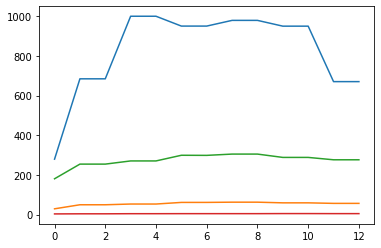

In [16]:
centroids2, los_demas = k_means_clust(time_series,4,5,2)
for i in centroids2:
    
    plt.plot(i)

plt.show()

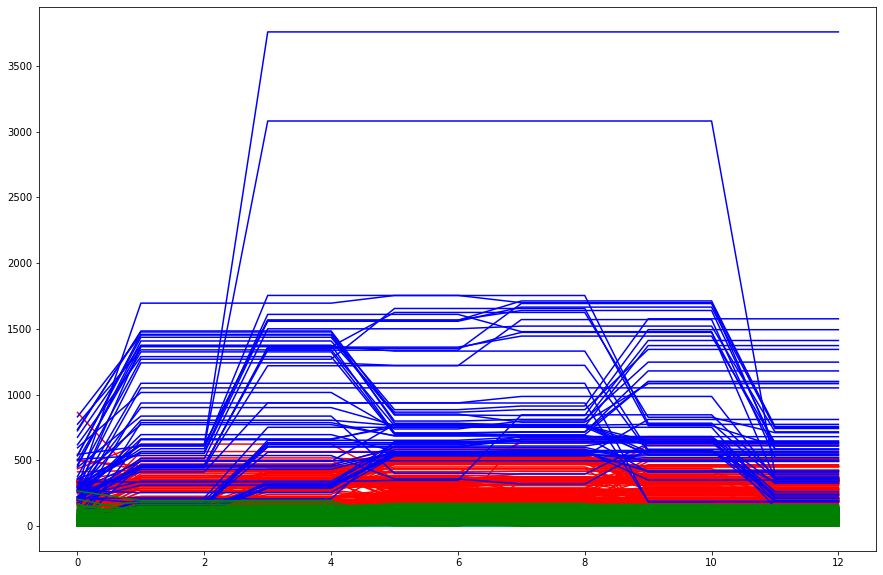

In [17]:
fig = plt.figure(figsize = (15,10))

for key in (los_demas):
    indexes = los_demas[key]
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes:
        serie = time_series[i]
        #serie = (serie - serie.min() )/(serie.max() - serie.min())
        plt.plot(serie, c = c)
    

In [18]:
new_clusters = []

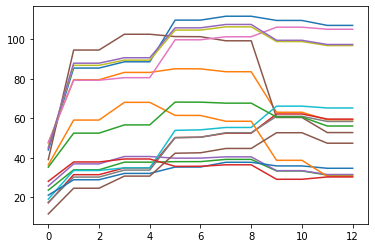

In [31]:
new_dict = {}
fig = plt.figure()
for key in (los_demas):
    
    cluster_indexes = los_demas[key]
    new_serie = []
    for i in indexes:
        new_serie.append(time_series[i])
    c, w = k_means_clust(new_serie,4,5,2)
    new_dict[key] = [new_serie, c, w]
    #fig = plt.figure()
    #plt.title = "From Cluster # " + str(key)
    for i in c:
        
        plt.plot(i)

        #plt.show()


    

In [34]:
alto_voltaje = new_dict[0]
medio_voltaje = new_dict[1]
bajo_voltaje = new_dict[2]


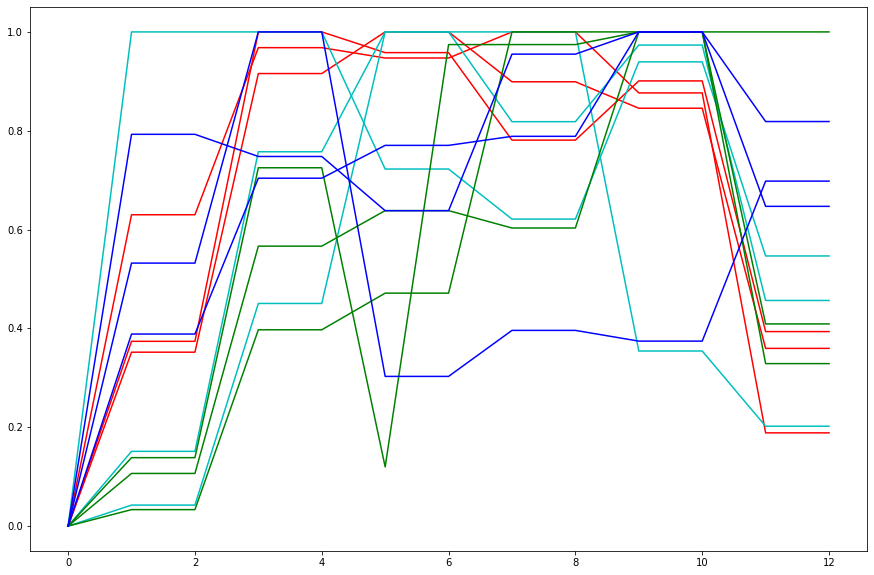

In [49]:
fig = plt.figure(figsize = (15,10))
ts = alto_voltaje[0]
for key in (alto_voltaje[2]):
    indexes = alto_voltaje[2][key]
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes[:3]:
        serie = ts[i]
        serie = (serie - serie.min() )/(serie.max() - serie.min())
        plt.plot(serie, c = c)
    

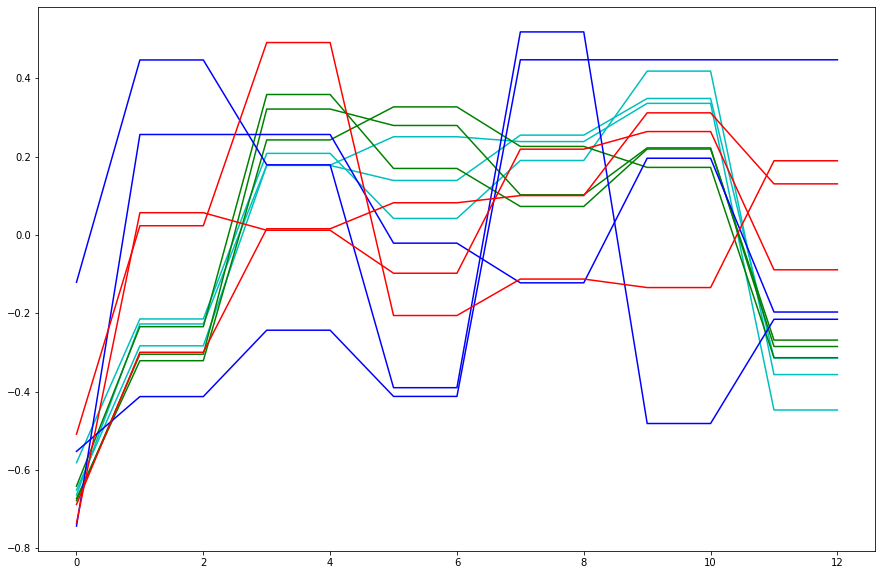

In [48]:
fig = plt.figure(figsize = (15,10))
ts = medio_voltaje[0]
ks = medio_voltaje[2]
for key in (ks):
    indexes = ks[key]
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes[:3]:
        serie = ts[i]
        
        serie = (serie - serie.mean()) / (serie.max() - serie.min())
        
        #serie = (serie - serie.min() )/(serie.max() - serie.min())
        plt.plot(serie, c = c)
    